In [75]:
#import needed packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests
from PIL import Image # to open images
import requests
# from io import BytesIOi
import seaborn as sns

Get data from: https://data.ontario.ca/dataset/wild-turkey-harvests

Get data from: https://geohub.lio.gov.on.ca/datasets/lio::wildlife-management-unit/about

Get data from: https://github.com/ropensci/rnaturalearth

Accessed: February 2, 2026


In [76]:
#read in and clean the data for visualizations in python first
turkey = pd.read_csv('wild_turkey_2024.csv', encoding='unicode_escape')
#not sure why there are some weird unicodes
turkey.columns = [c.replace(' ', '_') for c in turkey.columns]
turkey

,WMU,Year,Spring_Harvest,Fall_Harvest,Total_Harvest
0,36,2017,32,...,32
1,36,2018,25,,25
2,36,2019,67,...,67
3,36,2020,94,...,94
4,36,2021,106,...,106
...,...,...,...,...,...
843,Total,2020,19600,916,20516
844,Total,2021,18638,703,19341
845,Total,2022,17214,827,18041
846,Total,2023,17777,701,18478


In [77]:
#now to make this look nicer
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


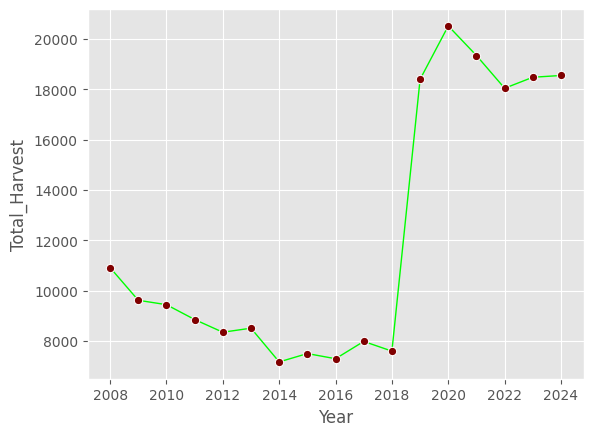

In [78]:
#my first visualization will be the total turkey harvested from 2008 - 2024
#first filter for totals over years only
turkey_totals = turkey[turkey['WMU'] == 'Total']

plt.style.use('ggplot')
turkey_graph = sns.lineplot(data = turkey_totals,
             x = 'Year',
             y = 'Total_Harvest',
             color = 'lime',
             linewidth = 1,
             marker = 'o',
             markerfacecolor = 'maroon')



In [79]:
#there is an interesting pattern here!
#I can plot this differently based on pre and post regulations

conditions = [
    (turkey_totals['Year'] < 2019),
    (turkey_totals['Year'] >= 2019)]

values = ['Pre-Regulations', 'Post-Regulations']

# Create the new 'rating' column using np.select()
turkey_totals['Regulation Status'] = np.select(conditions, values, default='Not_Rated') #
turkey_totals


C:\Users\qqjes\AppData\Local\Temp\ipykernel_12156\3036291960.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey_totals['Regulation Status'] = np.select(conditions, values, default='Not_Rated') #


,WMU,Year,Spring_Harvest,Fall_Harvest,Total_Harvest,Regulation Status
831,Total,2008,10492,427,10919,Pre-Regulations
832,Total,2009,9252,370,9622,Pre-Regulations
833,Total,2010,9086,361,9447,Pre-Regulations
834,Total,2011,8560,298,8858,Pre-Regulations
835,Total,2012,8079,274,8353,Pre-Regulations
836,Total,2013,8274,240,8514,Pre-Regulations
837,Total,2014,6912,262,7174,Pre-Regulations
838,Total,2015,7262,244,7506,Pre-Regulations
839,Total,2016,7102,199,7301,Pre-Regulations
840,Total,2017,7763,225,7988,Pre-Regulations


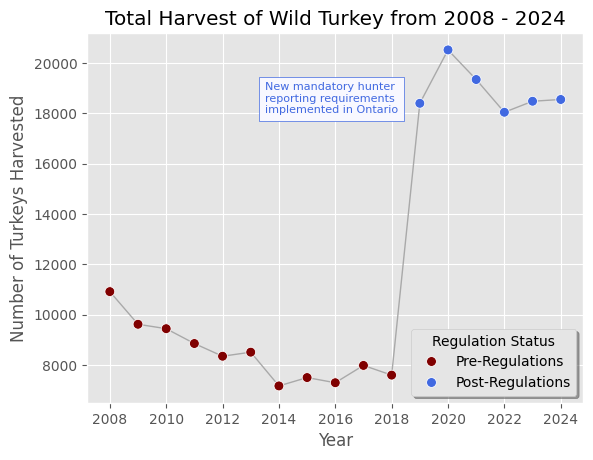

In [81]:
#separate into pre and post regulations
sns.lineplot(data=turkey_totals,
             x='Year',
             y='Total_Harvest',
             color='darkgrey',
             linewidth=1,
             legend=False,
             zorder = 1)

tk_scatter = sns.scatterplot(data=turkey_totals,
                x='Year',
                y='Total_Harvest',
                hue='Regulation Status',
                palette={'Pre-Regulations': 'maroon', 'Post-Regulations': 'royalblue'},
                s=50,  # size of markers
                legend=True)
sns.move_legend(tk_scatter, "lower right", shadow=True)


#annotate and make it look nice
plt.text(x=2013.5, y=18000, s="New mandatory hunter\nreporting requirements\nimplemented in Ontario", 
         fontsize=8, color='royalblue',
         horizontalalignment = 'left', bbox=dict(facecolor='ghostwhite', edgecolor='royalblue'))
tk_scatter.set(title = "Total Harvest of Wild Turkey from 2008 - 2024", 
             xlabel = 'Year', 
             ylabel = 'Number of Turkeys Harvested', )

plt.savefig("visualization_1_python_harvest_plot.png", dpi = 300)

---------------------END OF VISUALIZATION NUMBER 1---------------------

In [2]:
%load_ext rpy2.ipython
#magic with R

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


In [3]:
%%R
#now we can use R!
library(tidyverse)
turkey_r <- read.csv("wild_turkey_2024.csv", encoding = "UTF-8")
turkey_r

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   4.0.0     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
      WMU Year Spring.Harvest Fall.Harvest Total.Harvest
1      36 2017             32          ...            32
2      36 2018             25         <85>            25
3      36 2019             67          ...            67
4      36 2020             94          ...            94
5      36 2021            106          ...           106
6      36 2022            109          ...           109
7      36 2023            117         <85>           117
8      36 2024      

In addition: Warning messages:
1: package 'ggplot2' was built under R version 4.4.3 
2: package 'lubridate' was built under R version 4.4.3 


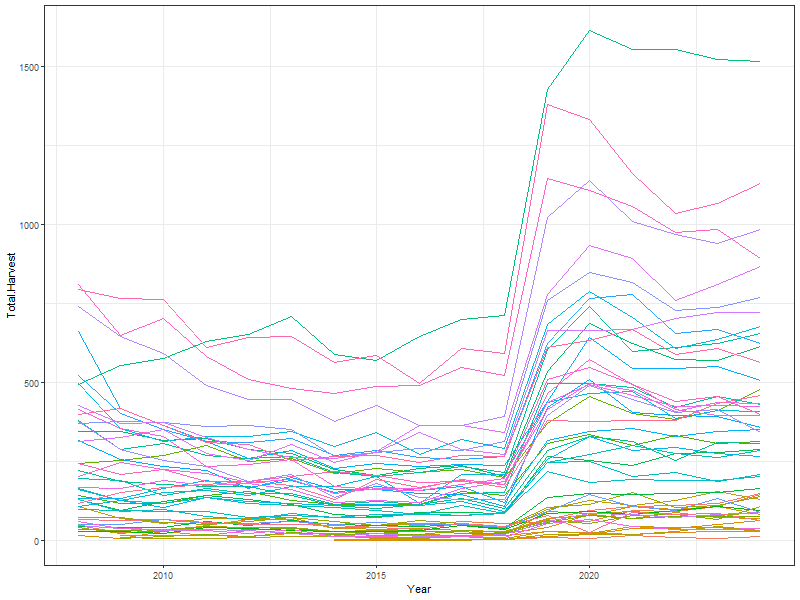

In [7]:
%%R -w 800 -h 600
turkey_areas <- filter(turkey_r, WMU != "Total")
ggplot(turkey_areas, aes(x = Year, y = Total.Harvest, group = WMU, color = WMU)) + 
geom_line() +
theme_bw() + theme(legend.position = 'none') + coord_cartesian(clip = 'off')
#okay, this is interesting, it seems that some WMUs have way larger reporting increases compared to the others!

In [8]:
%%R
#can we highlight the differences?
library(viridis)


Loading required package: viridisLite


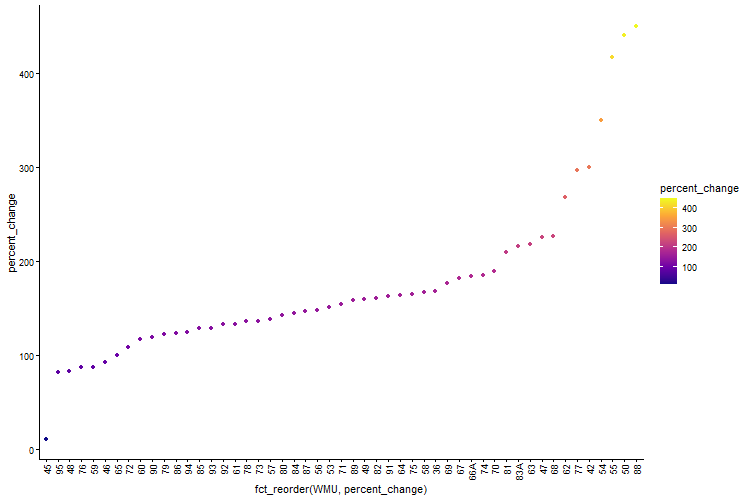

In [ ]:
%%R -w 750 -h 500
#select only relevant columns
turkey_areas_totals <- select(turkey_areas, WMU, Year, Total.Harvest)

#plot % differences in reporting by massaging the data
turkey_areas_totals_18_19 <- turkey_areas_totals %>%
  filter(Year %in% c(2018, 2019)) %>% 
  pivot_wider(
    names_from = Year,
    values_from = Total.Harvest)
  
turkey_areas_totals_18_19$percent_change <- 100*((turkey_areas_totals_18_19$`2019`-turkey_areas_totals_18_19$`2018`)/turkey_areas_totals_18_19$`2018`)
turkey_areas_totals_18_19

#plot ordered
ggplot(data = turkey_areas_totals_18_19, aes(x = fct_reorder(WMU, percent_change), y = percent_change, color = percent_change)) + 
geom_point() +
scale_color_viridis_c(option = 'plasma') +
theme_classic() +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
#So there are differences!

In [ ]:
%%R
#I think we can do something cool here with geographical data
#below is a resource for shape polygons of each WMU ID!
#https://geohub.lio.gov.on.ca/datasets/wildlife-management-unit
library(sf)
library(rnaturalearth)
library(rnaturalearthdata)
library(ggrepel)


In [ ]:
%%R
#download plot for province of ontario
map <- ne_download( scale = 10L, type = "states", category = "cultural") %>%
filter(woe_name == "Ontario")

Reading 'ne_10m_admin_1_states_provinces_lakes.zip' from naturalearth...


In [ ]:
%%R
wmus <- read_sf("Wildlife_Management_Unit/Wildlife_Management_Unit.shp")
#now we can do a left join of the percent change information based on the id
#strip the endings to 'generalize'
wmus$OFFICIAL_N <- gsub("[^0-9.-]", "", wmus$OFFICIAL_N)
#reflect this in the polygons too
wmus <- wmus %>%
  group_by(OFFICIAL_N) %>%


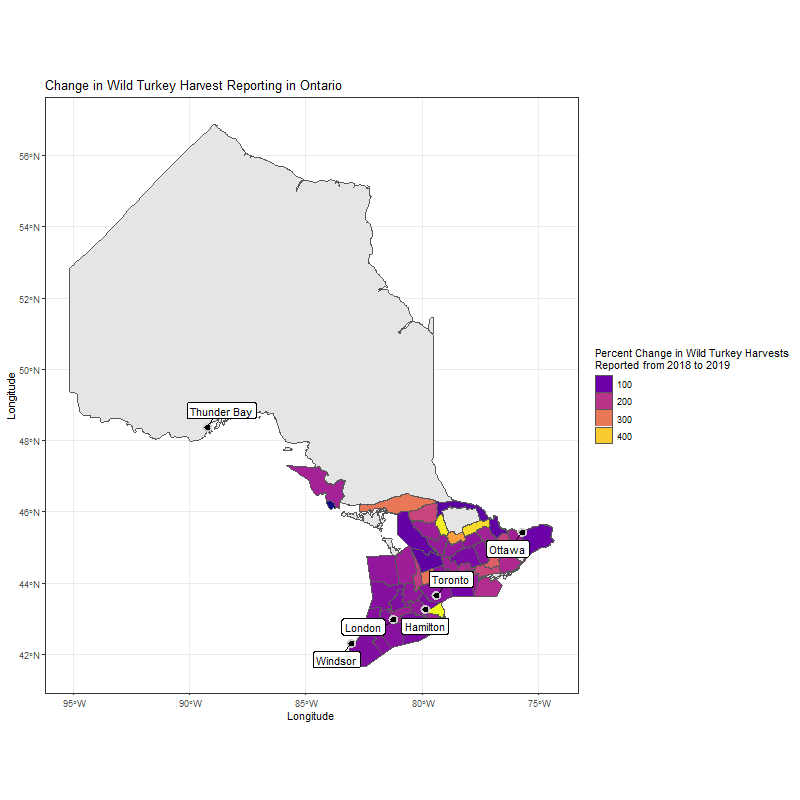

In [73]:
%%R  -w 800 -h 800
wmus_joined <- left_join(turkey_areas_totals_18_19, wmus, by = c("WMU" = "OFFICIAL_N"))
#overlay on plot of ontario
#add some major cities
major_cities <- data.frame(
  city = c("Toronto", "Ottawa", "Hamilton", "London", "Windsor", "Thunder Bay"),
  lat = c(43.6532, 45.4215, 43.2557, 42.9849, 42.3149, 48.3809),
  long = c(-79.3832, -75.6972, -79.8711, -81.2453, -83.0364, -89.2477)
)
#plot
ggplot() + geom_sf(data = map, aes(geometry = geometry))  + 
geom_sf(data = wmus_joined, aes(geometry = geometry, fill = percent_change)) +
scale_fill_viridis_c(option = 'plasma') + 
geom_point(data = major_cities, aes(x = long, y = lat), color = "grey80", size = 3, fill = 'black', stroke = 1.5, shape = 21) +
geom_label_repel(data = major_cities, aes(x = long, y = lat, label = city),
                  box.padding = 0.5) + theme_bw() + 
                  guides(fill=guide_legend(title="Percent Change in Wild Turkey Harvests\nReported from 2018 to 2019")) +
                  ggtitle("Change in Wild Turkey Harvest Reporting in Ontario") + labs(x = "Longitude", y = "Longitude")


---------END OF VISUALIZATION PT. 2---------